In [1]:
import os
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import numpy as np

In [2]:
class VoxelizedShapeNetDataset(Dataset):
    def __init__(self, root_dir, aligned=True):
        self.root_dir = root_dir
        self.aligned = aligned
        self.synset_ids = os.listdir(root_dir)
        self.model_paths = []
        for synset_id in self.synset_ids:
            for model_id in os.listdir(os.path.join(root_dir, synset_id)):
                self.model_paths.append((synset_id, model_id, os.path.join(root_dir, synset_id, model_id)))
    
    def __len__(self):
        return len(self.model_paths)

    def __getitem__(self, idx):
        synset_id, model_id, model_path = self.model_paths[idx]
        if self.aligned:
            voxel_array = np.load(os.path.join(model_path, 'aligned_voxel.npy'))
        else:
            voxel_array = np.load(os.path.join(model_path, 'voxel.npy'))
        return synset_id, model_id, torch.from_numpy(voxel_array)
    
    

In [3]:
# Initialize ShapeNetCore dataset
SHAPENET_PATH = "D:/ShapeNet_Voxelized"
aligned_dataset = VoxelizedShapeNetDataset(SHAPENET_PATH, aligned=True)
unaligned_dataset = VoxelizedShapeNetDataset(SHAPENET_PATH, aligned=False)

In [4]:
print(len(aligned_dataset))
print(len(unaligned_dataset))

52444
52444


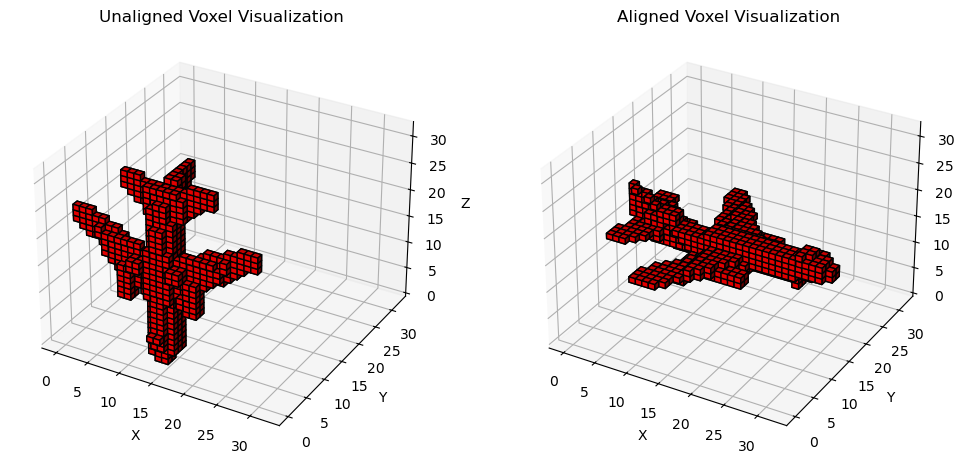

In [10]:
Model_num = 44

# Get a voxel array from each dataset
aligned_voxel_array = aligned_dataset[Model_num][2]
unaligned_voxel_array = unaligned_dataset[Model_num][2]

# Create a figure and two 3D axes
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot the filled voxels for the aligned model
ax1.voxels(unaligned_voxel_array, facecolors='red', edgecolor="black")
ax1.set_title('Unaligned Voxel Visualization')

# Plot the filled voxels for the unaligned model
ax2.voxels(aligned_voxel_array, facecolors='red', edgecolor="black")
ax2.set_title('Aligned Voxel Visualization')

# Set plot labels
for ax in [ax1, ax2]:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.show()

In [11]:
import ipywidgets as widgets
from IPython.display import display

# Create sliders for the elevation and azimuth angles
elev_slider = widgets.IntSlider(min=0, max=180, step=10, value=30, description='Elev')
azim_slider = widgets.IntSlider(min=0, max=360, step=10, value=30, description='Azim')

# Create a function to update the plot
def update_plot(elev, azim):
    # Clear the current plot
    plt.clf()

    # Create a figure and two 3D axes
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    # Set the viewing angle
    ax1.view_init(elev=elev, azim=azim)
    ax2.view_init(elev=elev, azim=azim)

    # Plot the filled voxels for the aligned model
    ax1.voxels(unaligned_voxel_array, facecolors='red', edgecolor="black")
    ax1.set_title('Unaligned Voxel Visualization')

    # Plot the filled voxels for the unaligned model
    ax2.voxels(aligned_voxel_array, facecolors='red', edgecolor="black")
    ax2.set_title('Aligned Voxel Visualization')

    # Set plot labels
    for ax in [ax1, ax2]:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    plt.show()

# Create interactive widgets
widgets.interactive(update_plot, elev=elev_slider, azim=azim_slider)

interactive(children=(IntSlider(value=30, description='Elev', max=180, step=10), IntSlider(value=30, descripti…

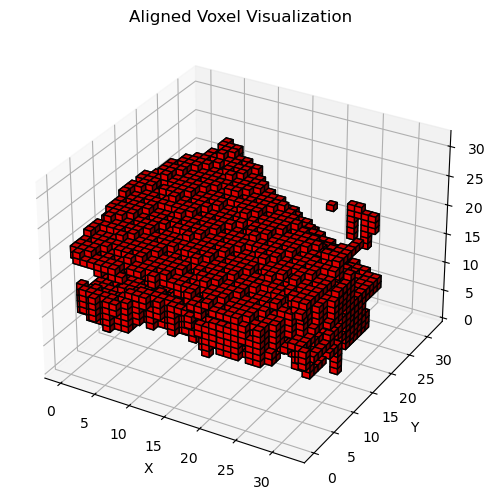

In [8]:
def get_model_by_id(dataset, synset_id, model_id):
    for i in range(len(dataset)):
        model_synset_id, model_model_id, voxel_data = dataset[i]
        if model_synset_id == synset_id and model_model_id == model_id:
            return voxel_data
    return None

model_data = get_model_by_id(aligned_dataset, '03928116', '4b29f873229621a13a1b23713d5a88eb')


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(model_data, facecolors='red', edgecolor="black")
ax.set_title('Aligned Voxel Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()